In [1]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
tickers = ['SPY', 'IWM', 'MDY', 'QQQ']

start = dt.datetime(2009, 1, 1)
end = dt.datetime(2020, 1, 1)

data = pdr.get_data_yahoo(tickers, start, end)

data = data['Adj Close']

In [3]:
data

Symbols,SPY,IWM,MDY,QQQ
Date,,,,
2009-01-02,73.024796,42.390228,85.779068,27.635725
2009-01-05,72.938377,42.542164,86.131493,27.626810
2009-01-06,73.425415,43.259644,87.283340,27.902905
2009-01-07,71.225891,41.985077,84.610016,27.110258
2009-01-08,71.516556,42.187656,85.031212,27.395250
...,...,...,...,...
2019-12-24,315.341095,164.337219,369.846344,210.720291
2019-12-26,317.019714,164.337219,370.664368,212.579697
2019-12-27,316.941162,163.528748,369.944885,212.400726


In [4]:
log_returns = np.log(data/data.shift())

In [5]:
len(log_returns)

2768

In [6]:
position = np.zeros((len(log_returns), 4))

In [7]:
position[:,0] = 1

In [8]:
(log_returns*position).sum(axis=1).cumsum().apply(np.exp)

Date
2009-01-02    1.000000
2009-01-05    0.998817
2009-01-06    1.005486
2009-01-07    0.975366
2009-01-08    0.979346
                ...   
2019-12-24    4.318274
2019-12-26    4.341261
2019-12-27    4.340186
2019-12-30    4.316257
2019-12-31    4.326743
Length: 2768, dtype: float64

In [9]:
log_returns.index.get_loc('2019-01-04')

2518

### Rolling sum

In [10]:
rolling_sum = log_returns.copy()

for ticker in tickers:
    rolling_sum[ticker] = rolling_sum[ticker].rolling(20).sum()

In [11]:
rolling_sum = rolling_sum.loc['2010':]
log_returns = log_returns.loc['2010':]

In [12]:
position = rolling_sum.apply(lambda x: x == rolling_sum.max(axis=1)).astype(int).shift().to_numpy()

In [13]:
position[0] = position[1]

In [14]:
position

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [15]:
(log_returns*position).sum(axis=1).cumsum().apply(np.exp)

Date
2010-01-04    1.024664
2010-01-05    1.021140
2010-01-06    1.020179
2010-01-07    1.025015
2010-01-08    1.031437
                ...   
2019-12-24    3.969571
2019-12-26    4.004598
2019-12-27    4.001227
2019-12-30    3.975003
2019-12-31    3.982495
Length: 2516, dtype: float64

<IPython.core.display.Javascript object>


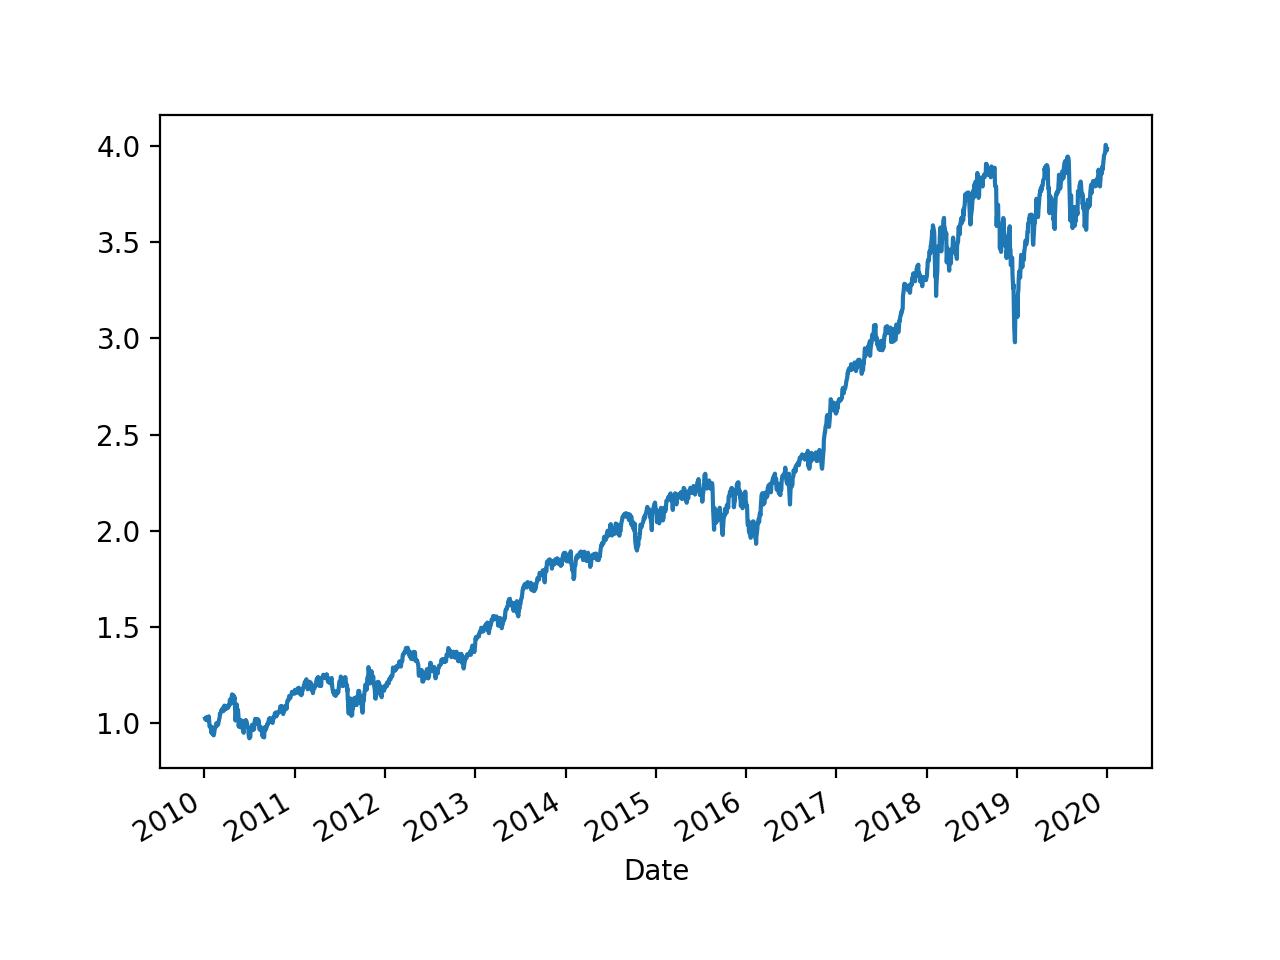

<AxesSubplot:xlabel='Date'>

In [16]:
(log_returns*position).sum(axis=1).cumsum().apply(np.exp).plot()

In [17]:
np.nanmax(position[:].sum(axis=1))

1.0

In [18]:
position[:21,0] = 1

In [19]:
position[0] = [1, 0, 0,0]

In [20]:
def calculate(data):
    cagr = (data.iloc[-1]/data.iloc[0])**(1/10) - 1
    
    rolling_max = data.cummax()
    daily_drawdown = data/rolling_max - 1
    drawdown = daily_drawdown.cummin().iloc[-1]

    log_returns = np.log(data/data.shift())
    volatility = log_returns.std()*(252**.5)
    
    return cagr, drawdown, volatility

def evaluate_position(data, position):
    spy_cagr, spy_drawdown, spy_vol = calculate(data['SPY'])
    
    series = (np.log(data/data.shift())*position).sum(axis=1).cumsum().apply(np.exp)
    
    print(series.head())
    
    bt_cagr, bt_drawdown, bt_vol = calculate(series)
    
    print(spy_cagr, spy_drawdown, spy_vol)
    print(bt_cagr, bt_drawdown, bt_vol)

In [22]:
evaluate_position(data.loc['2010':], position)

Date
2010-01-04    1.000000
2010-01-05    0.999199
2010-01-06    0.998962
2010-01-07    1.007934
2010-01-08    1.017624
dtype: float64
0.13244548148388002 -0.1934892785101755 0.14717472883158292
0.14238356291418586 -0.23719643741328889 0.16962615608266327


In [23]:
1.14753979919496008**10

3.9598393547218262

In [33]:
pos = np.zeros((len(data.loc['2010':]), 4))

In [34]:
pos[:,0] = 1

In [35]:
evaluate_position(data.loc['2010':], pos)

Date
2010-01-04    1.000000
2010-01-05    1.002647
2010-01-06    1.003353
2010-01-07    1.007589
2010-01-08    1.010941
dtype: float64
0.13244548148388002 -0.1934892785101755 0.14717472883158292
0.13244548148388025 -0.19348927851017528 0.14717472883158284
